In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
from scipy.io import savemat

In [3]:
#material parameters
domain_min = -1
domain_max = 3
length = domain_max-domain_min
far_strain = 4
far_stress = 1.2
ref_modulus = 0.3

In [4]:
#Pieceswise constant elastic modulus
x = np.linspace(domain_min,domain_max,1000)
elastic_C = np.piecewise(x, [x <= -0.5, ((x > -0.5) & (x <= 1.5)), ((x > 1.5) & (x <= 2)), x > 2], [0.5, 1, 0.5, 1])

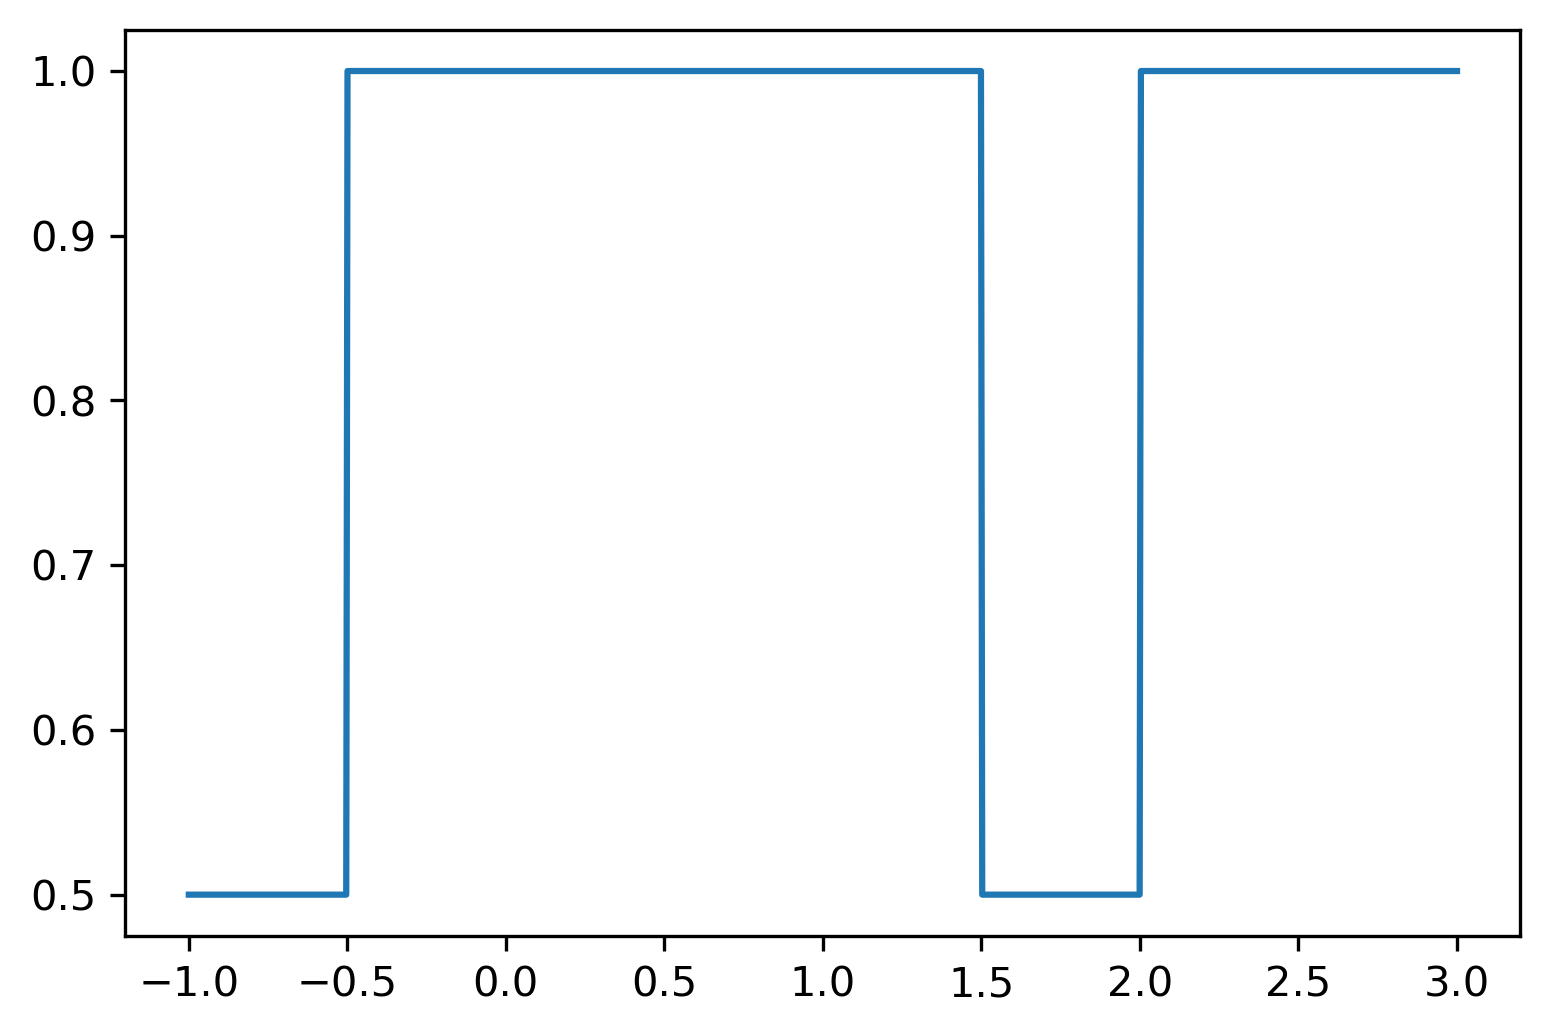

In [5]:
plt.plot(x,elastic_C)

0.8751251251251252


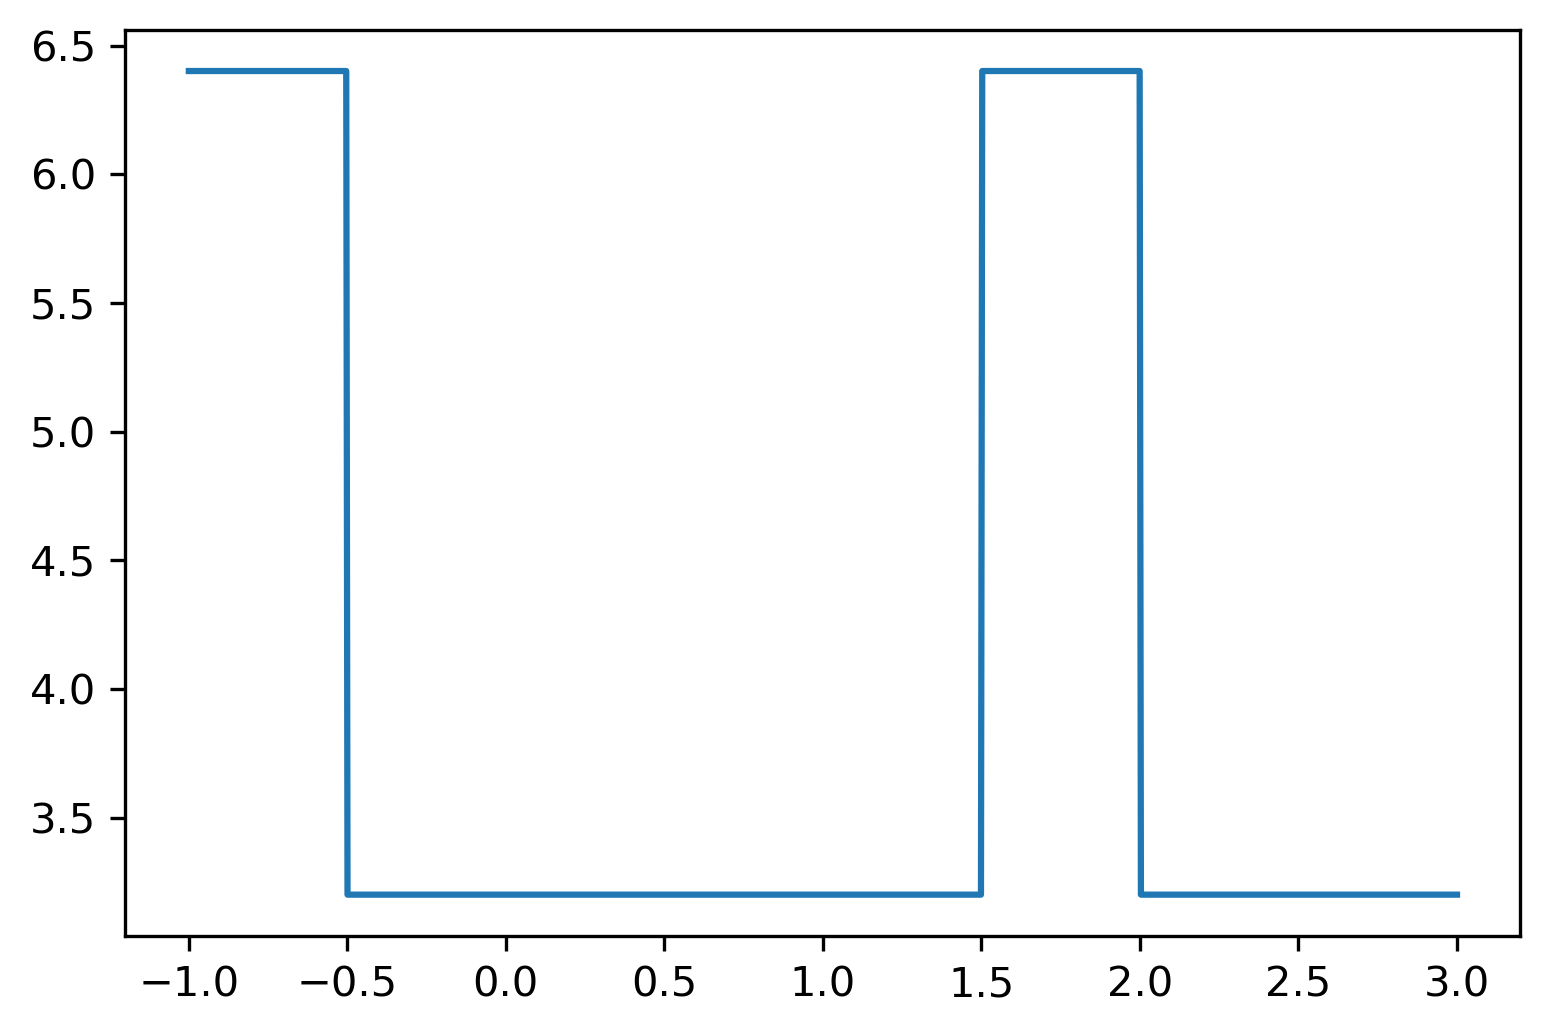

In [6]:
denom = np.trapz(1/elastic_C,x)   #parameter 
sigma = (length/denom)*far_strain #local strain
eps = sigma/elastic_C
print((1/length)*np.trapz(elastic_C,x))
plt.plot(x,eps)

In [7]:
#SCA Calculation
#clustering
#theoretical prediction
num_clusters = 2
clus_a_1 = 1;
clus_a_2 = 3;
clus1 = []
clus2 = []
for i in x:
    if ((i<=-0.5)|((i > 1.5) & (i <= 2))):
        clus1 = np.append(clus1,i)
    else:
        clus2 = np.append(clus2,i)

In [8]:
clus1_C = np.piecewise(clus1, [clus1 <= -0.5, ((clus1 > -0.5) & (clus1 <= 1.5)), ((clus1 > 1.5) & (clus1 <= 2)), clus1 > 2], [0.5, 1, 0.5, 1])
clus2_C = np.piecewise(clus2, [clus2 <= -0.5, ((clus2 > -0.5) & (clus2 <= 1.5)), ((clus2 > 1.5) & (clus2 <= 2)), clus2 > 2], [0.5, 1, 0.5, 1])

In [9]:
#homogenized stifness
denom_cluster = (1/np.trapz(clus1_C,clus1))+(9/np.trapz(clus2_C,clus2))
homo_C = length/denom_cluster

In [10]:
sigma_cluster = homo_C*far_strain

In [11]:
sigma_cluster

4.940275886677112

In [12]:
cluster1_strain = sigma_cluster/clus1_C
print(cluster1_strain)

[9.88055177 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177
 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177
 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177
 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177
 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177
 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177
 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177
 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177
 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177
 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177
 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177
 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177
 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177
 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177
 9.88055177 9.88055177 9.88055177 9.88055177 9.88055177 9.8805

In [13]:
## So far it was theory
## Now lets compute for arbitrary clusters
#material parameters
## Same domain and material properties
domain_min = 0
domain_max = 10
length = domain_max-domain_min
far_strain = 4
far_stress = 1.2
ref_modulus = 0.3
num_clusters = 32

In [14]:
# Generate points for modeling 
x = np.linspace(domain_min,domain_max,8192)
elastic_C = 1/(1+x**2)

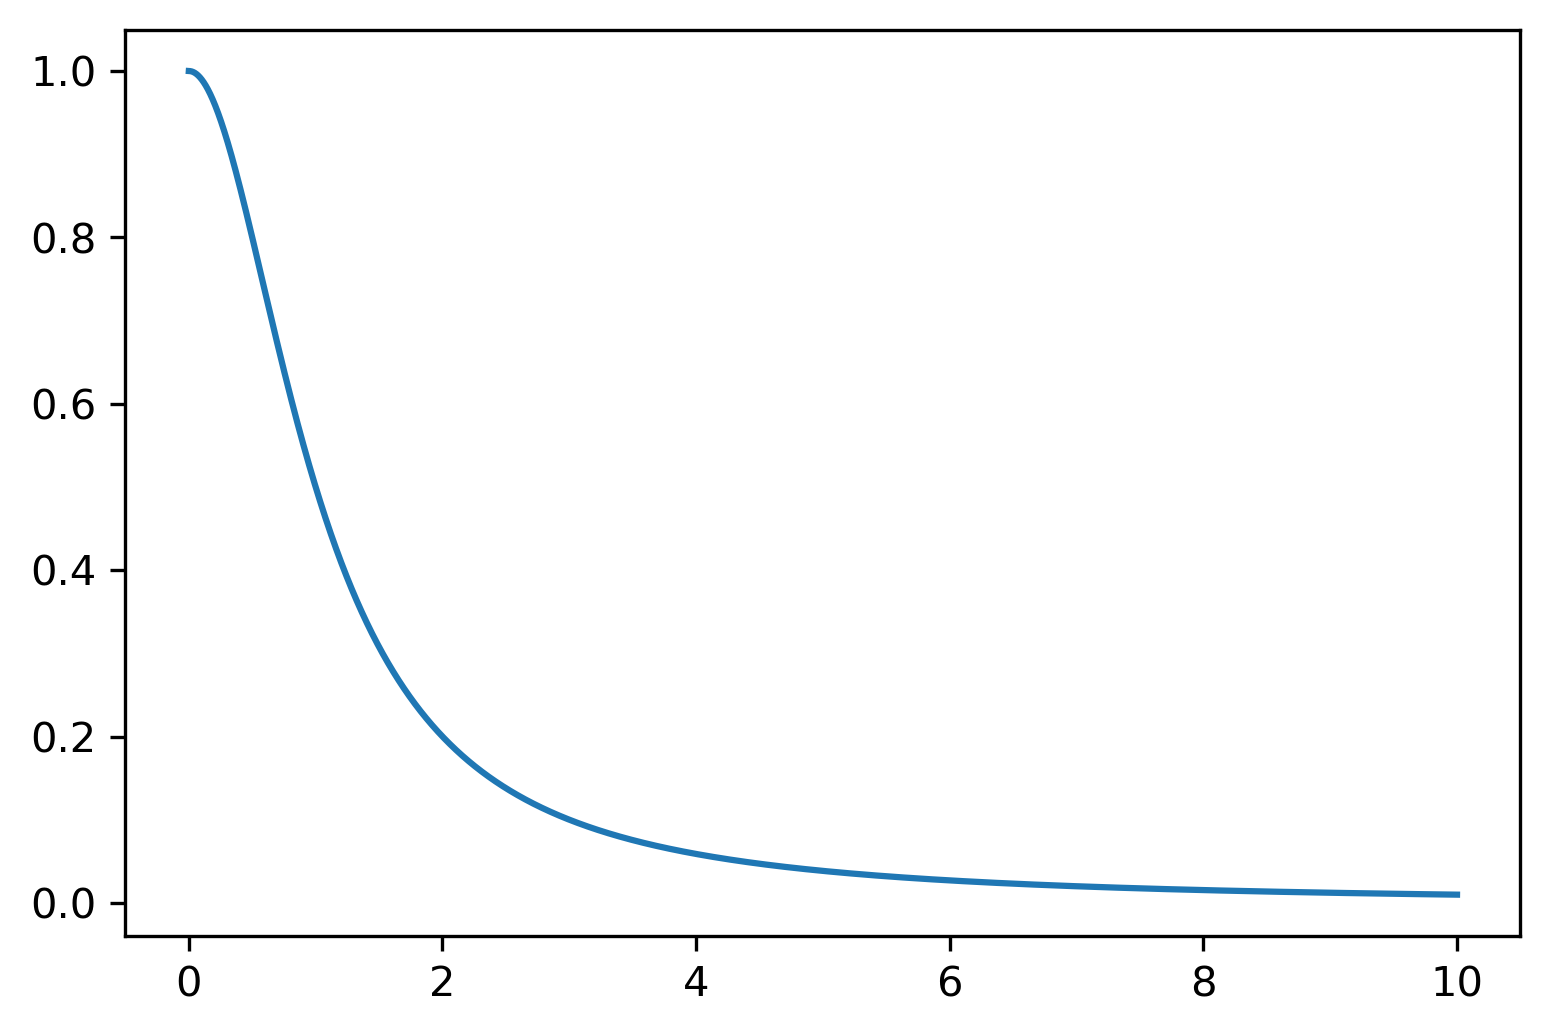

In [15]:
plt.plot(x,elastic_C)

In [16]:
from sklearn.cluster import KMeans

In [17]:
## K-means clustering
dataset=np.array(list(zip(x, elastic_C)))

In [18]:
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0).fit(dataset)

In [19]:
point_cluster = np.array(list(zip(x,kmeans.labels_)))

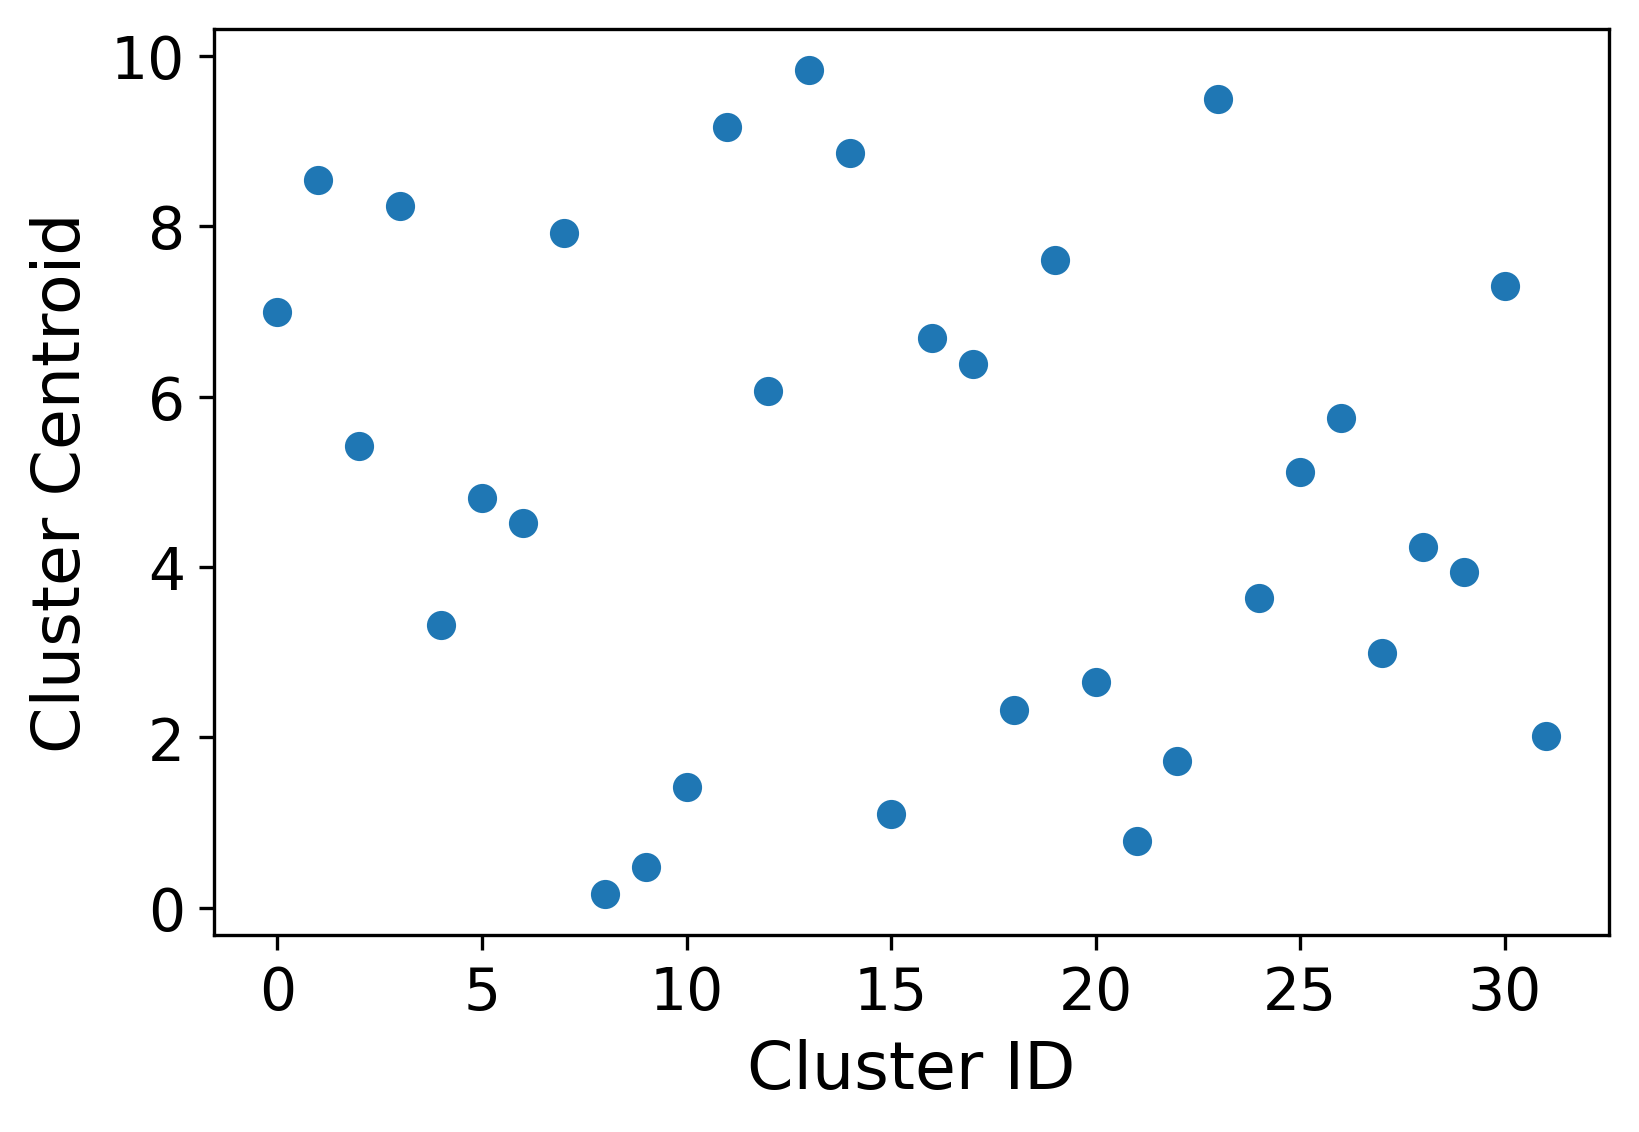

In [20]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_
def column(matrix, i):
    return [row[i] for row in matrix]
domain = column(centers,0)
value = np.linspace(0,31,32)
unique = []
[unique.append(n) for n in labels if n not in unique]
plt.scatter(unique,domain)
plt.xlabel('Cluster ID',fontsize=16)
plt.ylabel('Cluster Centroid',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('Centroid_vs_ID.png', dpi=300, bbox_inches='tight')

In [21]:
### Interaction Tensor (pointless for linear elastic one-d problem)
Int_T = np.zeros((num_clusters, num_clusters), int)
np.fill_diagonal(Int_T, 1/ref_modulus)

In [22]:
def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]

In [23]:
ClusterIndicesNumpy(0, kmeans.labels_)

array([6356, 6357, 6358, 6359, 6360, 6361, 6362, 6363, 6364, 6365, 6366,
       6367, 6368, 6369, 6370, 6371, 6372, 6373, 6374, 6375, 6376, 6377,
       6378, 6379, 6380, 6381, 6382, 6383, 6384, 6385, 6386, 6387, 6388,
       6389, 6390, 6391, 6392, 6393, 6394, 6395, 6396, 6397, 6398, 6399,
       6400, 6401, 6402, 6403, 6404, 6405, 6406, 6407, 6408, 6409, 6410,
       6411, 6412, 6413, 6414, 6415, 6416, 6417, 6418, 6419, 6420, 6421,
       6422, 6423, 6424, 6425, 6426, 6427, 6428, 6429, 6430, 6431, 6432,
       6433, 6434, 6435, 6436, 6437, 6438, 6439, 6440, 6441, 6442, 6443,
       6444, 6445, 6446, 6447, 6448, 6449, 6450, 6451, 6452, 6453, 6454,
       6455, 6456, 6457, 6458, 6459, 6460, 6461, 6462, 6463, 6464, 6465,
       6466, 6467, 6468, 6469, 6470, 6471, 6472, 6473, 6474, 6475, 6476,
       6477, 6478, 6479, 6480, 6481, 6482, 6483, 6484, 6485, 6486, 6487,
       6488, 6489, 6490, 6491, 6492, 6493, 6494, 6495, 6496, 6497, 6498,
       6499, 6500, 6501, 6502, 6503, 6504, 6505, 65

In [24]:
x[ClusterIndicesNumpy(1,kmeans.labels_)]

array([2.82016848, 2.82138933, 2.82261018, 2.82383103, 2.82505189,
       2.82627274, 2.82749359, 2.82871444, 2.82993529, 2.83115615,
       2.832377  , 2.83359785, 2.8348187 , 2.83603956, 2.83726041,
       2.83848126, 2.83970211, 2.84092296, 2.84214382, 2.84336467,
       2.84458552, 2.84580637, 2.84702723, 2.84824808, 2.84946893,
       2.85068978, 2.85191063, 2.85313149, 2.85435234, 2.85557319,
       2.85679404, 2.85801489, 2.85923575, 2.8604566 , 2.86167745,
       2.8628983 , 2.86411916, 2.86534001, 2.86656086, 2.86778171,
       2.86900256, 2.87022342, 2.87144427, 2.87266512, 2.87388597,
       2.87510682, 2.87632768, 2.87754853, 2.87876938, 2.87999023,
       2.88121109, 2.88243194, 2.88365279, 2.88487364, 2.88609449,
       2.88731535, 2.8885362 , 2.88975705, 2.8909779 , 2.89219875,
       2.89341961, 2.89464046, 2.89586131, 2.89708216, 2.89830302,
       2.89952387, 2.90074472, 2.90196557, 2.90318642, 2.90440728,
       2.90562813, 2.90684898, 2.90806983, 2.90929068, 2.91051

In [25]:
sum = 0
for i in range(0,num_clusters):
    T_C = x[ClusterIndicesNumpy(i,kmeans.labels_)]
    C_ind = elastic_C[ClusterIndicesNumpy(i,kmeans.labels_)]
    int_Clus_C = np.trapz(C_ind,T_C)
    lim = len(T_C)
    length_C = T_C[lim-1]-T_C[0]
    ratio = length_C**2/int_Clus_C
    sum = sum + ratio

In [26]:
C_homo = 4/sum

In [27]:
sigma_overall = C_homo*far_strain #it is constant for linear elastic material (for non-linear elastic we need solvers)

In [28]:
print(sigma_overall)

0.046812404676614454


In [29]:
e_local = []
co_ord_local = []
#Compute local strain for each cluster
for i in range(0,num_clusters):
    T_C = x[ClusterIndicesNumpy(i,kmeans.labels_)]
    C_ind = elastic_C[ClusterIndicesNumpy(i,kmeans.labels_)]
    int_Clus_C = np.trapz(C_ind,T_C)
    lim = len(T_C)
    length_C = T_C[lim-1]-T_C[0]
    strain = (sigma_overall*length_C)/int_Clus_C 
    b = list(np.ones(lim)*strain)
    e_local.append(b)
    co_ord_local.append(list(T_C))

In [30]:
# Distribute the strain from cluster space to physical space
len(co_ord_local)

32

In [31]:
merged_co_ord = []
merged_e_local = []
for l in co_ord_local:
    merged_co_ord += l
for s in e_local:
    merged_e_local += s

In [32]:
final_result = np.array(list(zip(merged_co_ord,merged_e_local)))

In [33]:
final_result= np.sort(final_result,axis=0)
final_result[0]

array([0.        , 0.04843769])

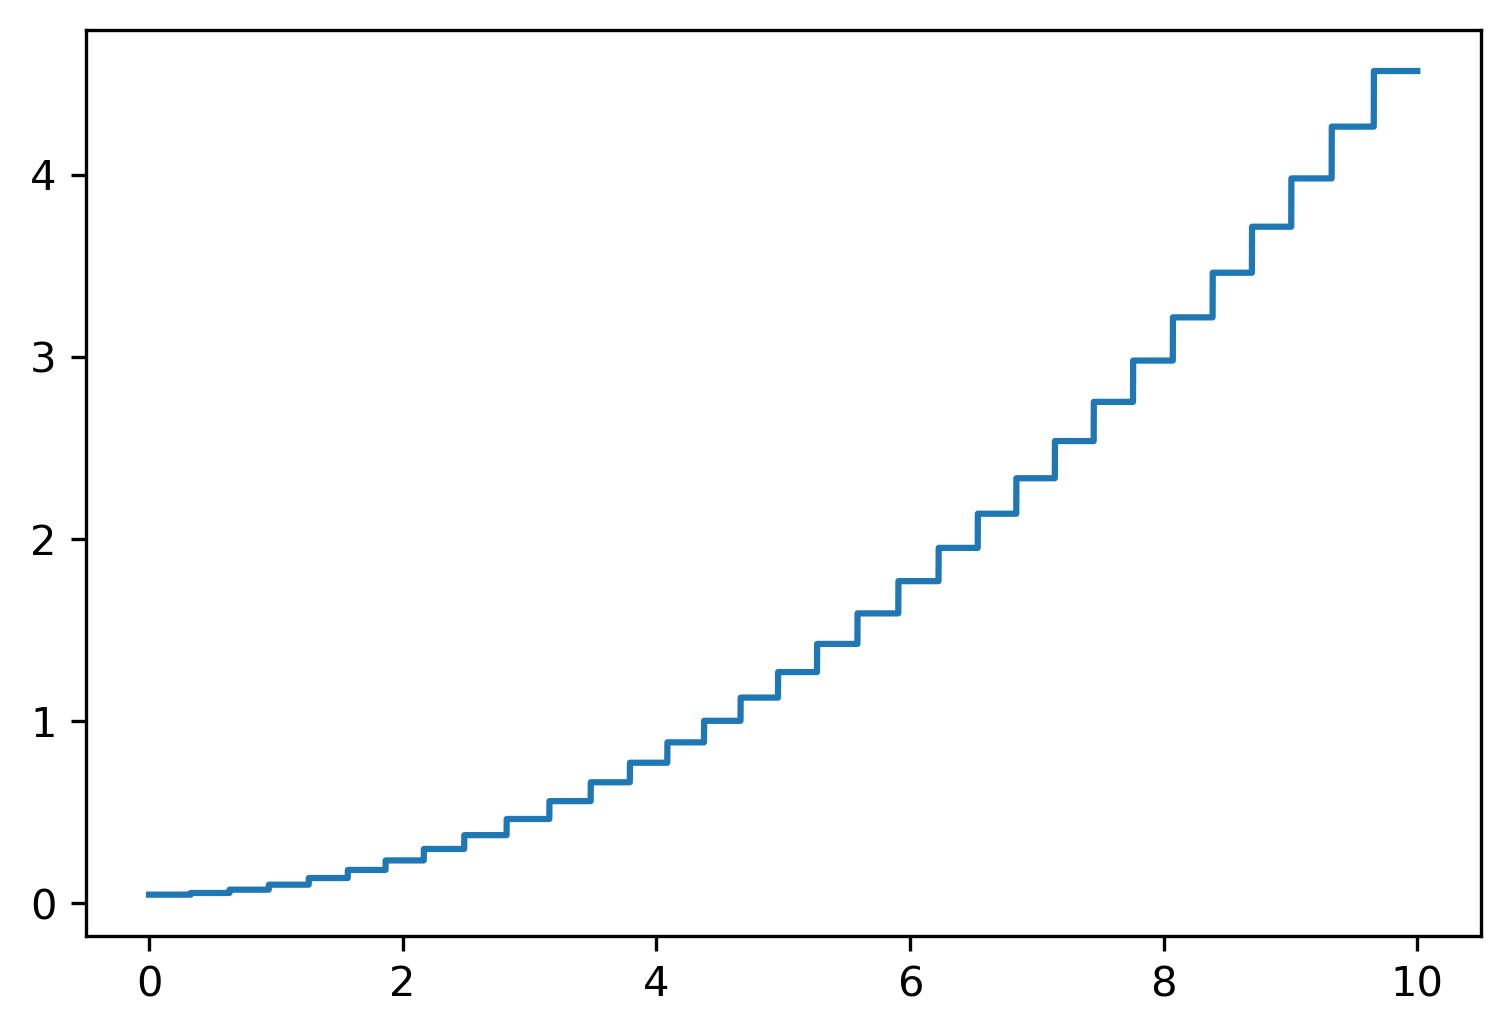

In [34]:
plt.plot(final_result[:,0],final_result[:,1])

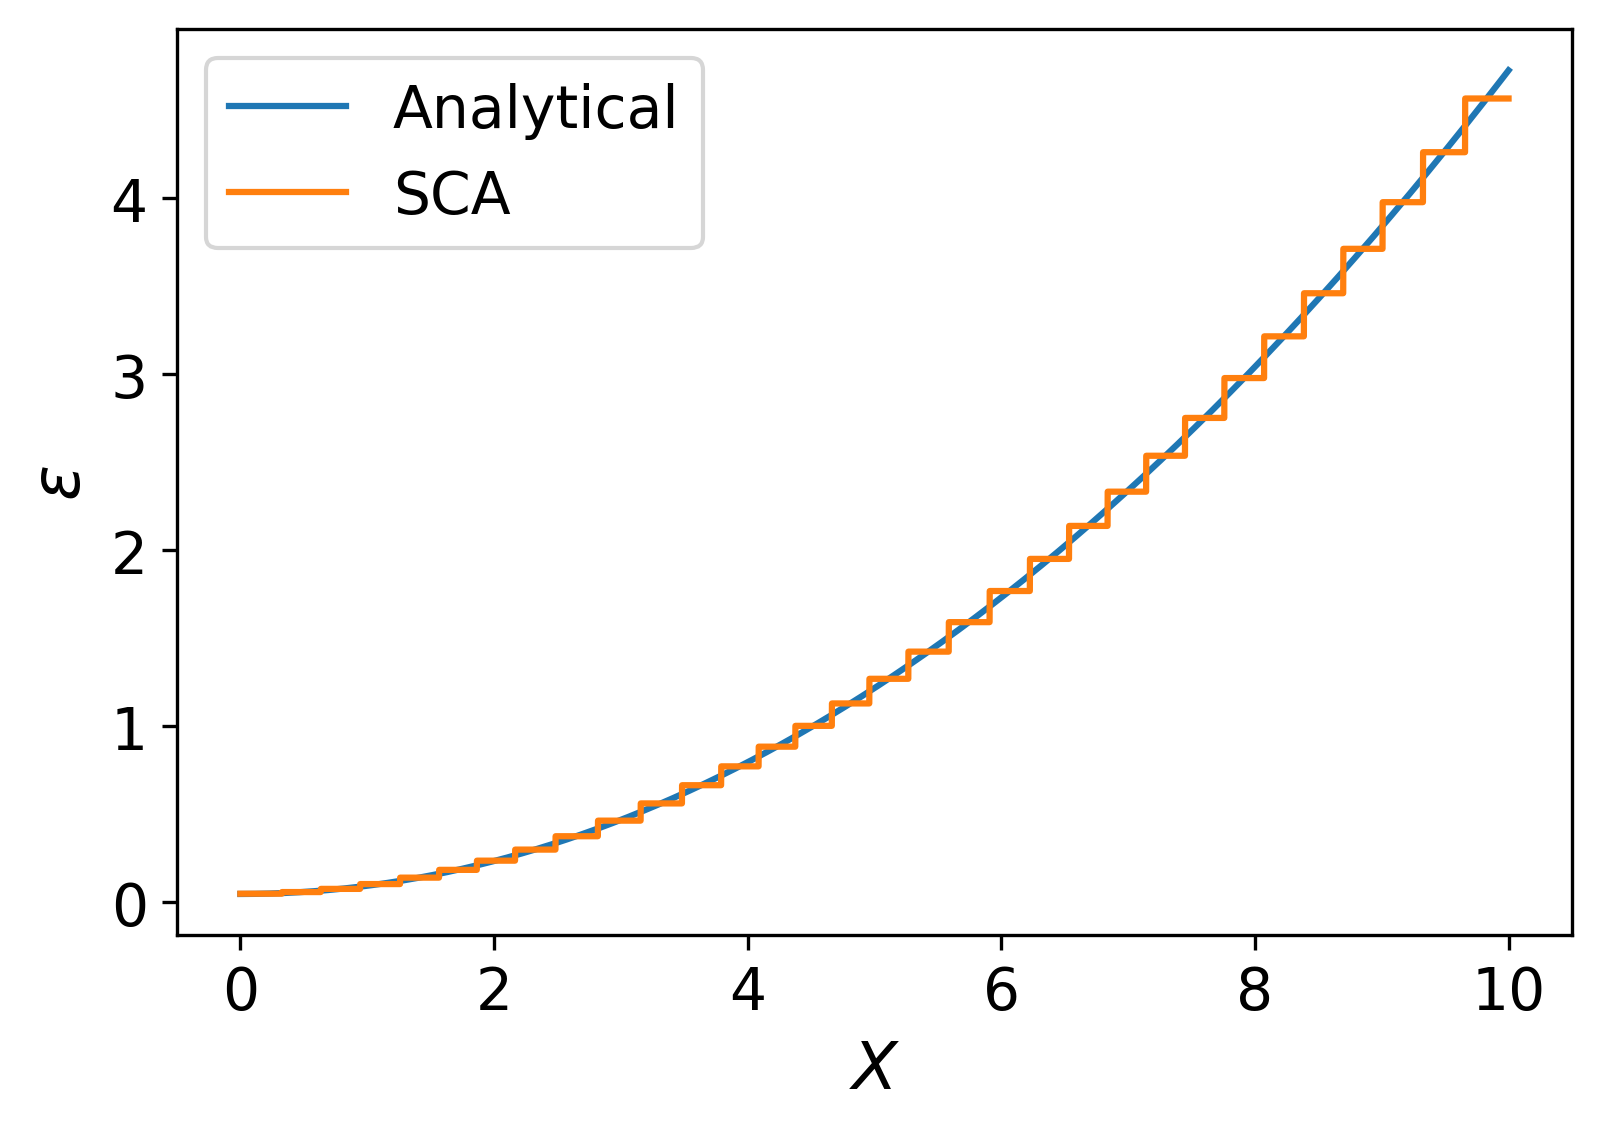

In [52]:
#Analytical Solution
equiv_C = 1/((1/length)*np.trapz(1/elastic_C,x))
analytical_local_strain = sigma_overall/elastic_C
plt.plot(x,analytical_local_strain,final_result[:,0],final_result[:,1])
plt.xlabel('$X$',fontsize=16)
plt.ylabel('$\epsilon$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(["Analytical", "SCA"], loc ="upper left",fontsize=14)
plt.savefig('SCA_VS_Analytical.png', dpi=300, bbox_inches='tight')

In [48]:
import pandas as pd
df = pd.read_excel('Book1.xlsx',index_col = 0)

In [49]:
df

,Mean Square Error
Epoch,
1,0.003508
2,0.012641
3,0.001667
4,0.001219
5,0.000974
...,...
96,0.000142
97,0.000141
98,0.000121


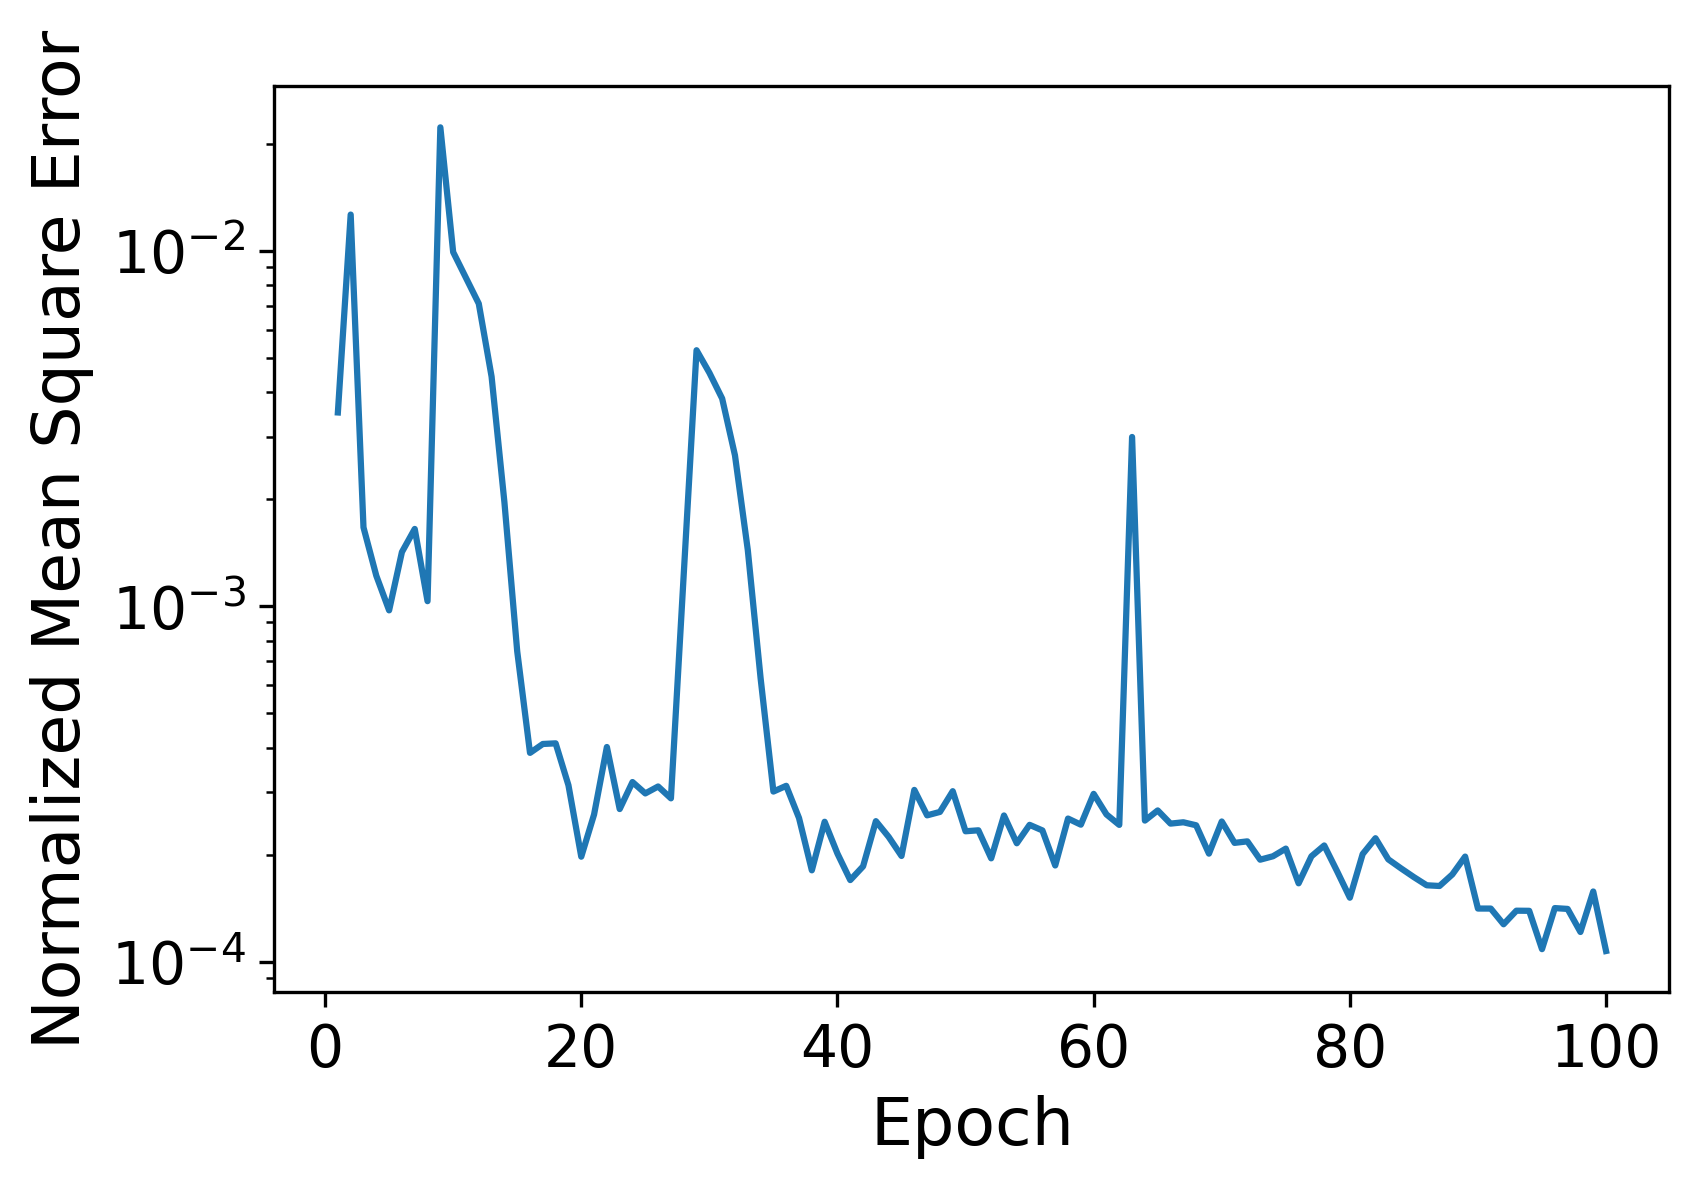

In [60]:
df.plot(legend=None)
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Normalized Mean Square Error',fontsize=16)
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('ERROR.png', dpi=300, bbox_inches='tight')